In [2]:
%pylab inline
import pandas as pd
import seaborn as sns
import scipy
import skimage
sns.set_style("ticks")
from pathlib import Path
output_path_images = Path("../text/")

# df = pd.read_excel("C:/Users/Jirik/data/medical/processed/SA_experiments.xlsx")
df = pd.read_excel("C:/Users/Jirik/data/medical/processed/scaffan2019/metacentrum/SA_experiments.xlsx")
df

Populating the interactive namespace from numpy and matplotlib


,Annotation Color,Annotation Details,Annotation ID,Annotation Title,Area,Area unit,Branch number,Central Vein Dice,Central Vein Jaccard,Central vein area,...,Processing;Skeleton Analysis;Working Resolution,Processing;Texture Analysis;GLCM Levels,Processing;Texture Analysis;Tile Size,Processing;Texture Analysis;Tile Spacing,Processing;Texture Analysis;Working Resolution,Scaffan Version,Skeleton length,platform.node,platform.processor,platform.system
0,#00FF00,PFCVI=2 SNI=2 SWP=1 SQZ=0.4 CVM=0 IFE=0,6,NaN,0.777046,mm,22489.0,NaN,NaN,0.056655,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,45.58554,krux2.ncbr.muni.cz,NaN,Linux
1,#00FF00,PFCVI=1 SNI=0 SWP=0 CMP=0.8,6,NaN,1.959020,mm,8871.0,NaN,NaN,0.085619,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,18.66592,konos2.fav.zcu.cz,NaN,Linux
2,#00FF00,PFCVI=1 SNI=0 SWP=0 CMP=0.9,1,NaN,1.562744,mm,NaN,0.108730,0.057491,0.137554,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,NaN,charon01.nti.tul.cz,NaN,Linux
3,#00FF00,PFCVI=1 SNI=0 SWP=0 CMP=0.9,2,NaN,1.031514,mm,NaN,0.072651,0.037695,0.148508,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,NaN,charon01.nti.tul.cz,NaN,Linux
4,#00FF00,PFCVI=1 SNI=0 SWP=0 SQZ=0.1,6,NaN,1.184912,mm,NaN,0.035911,0.018284,0.148555,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,NaN,charon01.nti.tul.cz,NaN,Linux
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,#0000FF,IFE=0 CVM=0 SQZ=0.2 SNI=1.5,9,NaN,0.920082,mm,14435.0,NaN,NaN,0.074718,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,28.39382,elmo5-14.hw.elixir-czech.cz,NaN,Linux
316,#0000FF,IFE=0 CVM=0 SQZ=0.2 SNI=2.0,10,NaN,0.817524,mm,15528.0,NaN,NaN,0.027523,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,29.15094,elmo5-14.hw.elixir-czech.cz,NaN,Linux
317,#0000FF,IFE=0 CVM=0 SQZ=0.1 SNI=2.0,11,NaN,1.190702,mm,15148.0,NaN,NaN,0.119581,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,26.50921,elmo5-14.hw.elixir-czech.cz,NaN,Linux
318,#0000FF,IFE=0 CVM=0 SQZ=0.2 SNI=2.0,12,NaN,1.728910,mm,35651.0,NaN,NaN,0.096388,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,65.94952,elmo5-14.hw.elixir-czech.cz,NaN,Linux


In [3]:
df.keys()

Index(['Annotation Color', 'Annotation Details', 'Annotation ID',
       'Annotation Title', 'Area', 'Area unit', 'Branch number',
       'Central Vein Dice', 'Central Vein Jaccard', 'Central vein area',
       'Datetime', 'Dead ends number', 'Experiment Datetime',
       'Experiment Title', 'File Name', 'File Path', 'GLCM Correlation',
       'GLCM Correlation p10', 'GLCM Correlation p25', 'GLCM Correlation p50',
       'GLCM Correlation p75', 'GLCM Correlation p90', 'GLCM Correlation var',
       'GLCM Energy', 'GLCM Energy p10', 'GLCM Energy p25', 'GLCM Energy p50',
       'GLCM Energy p75', 'GLCM Energy p90', 'GLCM Energy var',
       'GLCM Homogenity', 'GLCM Homogenity p10', 'GLCM Homogenity p25',
       'GLCM Homogenity p50', 'GLCM Homogenity p75', 'GLCM Homogenity p90',
       'GLCM Homogenity var', 'Input;Data Info', 'Input;File Path', 'Job ID',
       'Lobulus Border Dice', 'Lobulus Border Jaccard',
       'Lobulus Boundary Compactness', 'Lobulus Equivalent Diameter',
       '

In [4]:
np.unique(df["Scaffan Version"])

array(['0.14.0'], dtype=object)

In [5]:
np.unique(df["Experiment Datetime"])

array(['2019-07-23 22:31:23', '2019-07-23 22:32:14',
       '2019-07-23 22:32:29', '2019-08-19 15:49:13',
       '2019-08-21 05:46:08'], dtype=object)

In [6]:

# exp_title = "first area evaluation"
exp_title = "first seg eval"
# scaffan_version = "0.14.0"
select_by_datetime = ['2019-07-23 22:31:23', '2019-07-23 22:32:14', '2019-08-19 15:49:13', '2019-08-21 05:46:08']
# select_by_datetime = ['2019-07-23 22:31:23'] #, '2019-07-23 22:32:14']

In [7]:
def get_col_from_ann_details(df, colname):
    df[f"{colname}"] = pd.to_numeric(df["Annotation Details"].str.extract(f'{colname}=(\d*\.?\d*)')[0])
    return df
get_col_from_ann_details(df, "PFCVI")
get_col_from_ann_details(df, "SNI")
get_col_from_ann_details(df, "SWP");
get_col_from_ann_details(df, "CMP");
get_col_from_ann_details(df, "IFE");
get_col_from_ann_details(df, "SQZ");

df["Sum Semi-q"] = df["PFCVI"] + df["SNI"] + df["SWP"]

In [8]:
df.keys()

Index(['Annotation Color', 'Annotation Details', 'Annotation ID',
       'Annotation Title', 'Area', 'Area unit', 'Branch number',
       'Central Vein Dice', 'Central Vein Jaccard', 'Central vein area',
       'Datetime', 'Dead ends number', 'Experiment Datetime',
       'Experiment Title', 'File Name', 'File Path', 'GLCM Correlation',
       'GLCM Correlation p10', 'GLCM Correlation p25', 'GLCM Correlation p50',
       'GLCM Correlation p75', 'GLCM Correlation p90', 'GLCM Correlation var',
       'GLCM Energy', 'GLCM Energy p10', 'GLCM Energy p25', 'GLCM Energy p50',
       'GLCM Energy p75', 'GLCM Energy p90', 'GLCM Energy var',
       'GLCM Homogenity', 'GLCM Homogenity p10', 'GLCM Homogenity p25',
       'GLCM Homogenity p50', 'GLCM Homogenity p75', 'GLCM Homogenity p90',
       'GLCM Homogenity var', 'Input;Data Info', 'Input;File Path', 'Job ID',
       'Lobulus Border Dice', 'Lobulus Border Jaccard',
       'Lobulus Boundary Compactness', 'Lobulus Equivalent Diameter',
       '

# Add descriptors

In [9]:
df['Dead ends number norm'] = df['Dead ends number'] / df['Lobulus Equivalent Surface']
df['Skeleton length norm'] = df['Skeleton length'] / df['Lobulus Equivalent Surface']
df['Branch number norm'] = df['Branch number'] / df['Lobulus Equivalent Surface']
df['Relative dead ends number'] = df['Dead ends number'] / df['Area']
df['Relative skeleton length'] = df['Skeleton length'] / df['Area']
df['Relative branch number'] = df['Branch number'] / df['Area']

# Add annotation

In [10]:
# Overal scaffold quality
df["OSQ"] = df.SNI * (1-df.SQZ)

# Lobulus Structure Analysis
## Data selection

In [11]:
dfselector =  \
(df["Experiment Title"] == exp_title) &\
(df["Experiment Datetime"].isin(select_by_datetime)) &\
(df["Annotation Details"].notnull())
# (df["Experiment Datetime"] == select_by_datetime) # &\
# (df["Scaffan Version"] == scaffan_version)
dfcor = df[dfselector
][["Branch number", "GLCM Energy", "GLCM Homogenity", "GLCM Correlation", "Skeleton length", 
            "PFCVI", 
            "SNI", 
            "SWP", 
   "CMP",
   "Annotation Details"
#             "Sum Semi-q", 
#    "Experiment Title", "Scaffan Version"
  ]]
dfcor

,Branch number,GLCM Energy,GLCM Homogenity,GLCM Correlation,Skeleton length,PFCVI,SNI,SWP,CMP,Annotation Details
0,22489.0,0.479750,0.760151,0.896563,45.58554,2.0,2.0,1.0,NaN,PFCVI=2 SNI=2 SWP=1 SQZ=0.4 CVM=0 IFE=0
1,8871.0,0.747521,0.890338,0.649943,18.66592,1.0,0.0,0.0,0.8,PFCVI=1 SNI=0 SWP=0 CMP=0.8
28,20997.0,0.489401,0.775246,0.884424,41.95737,NaN,1.5,NaN,0.8,SNI=1.5 CMP=0.8 IFE=0 SQZ=0.4 CVM=0
29,13467.0,0.553613,0.783606,0.870150,26.14248,NaN,1.5,NaN,0.7,SNI=1.5 CMP=0.7 IFE=0 SQZ=0.3 CVM=0
30,15370.0,0.519606,0.784930,0.874722,30.87903,NaN,1.5,NaN,0.6,SNI=1.5 CMP=0.6 IFE=0 SQZ=0.5 CVM=0
...,...,...,...,...,...,...,...,...,...,...
315,14435.0,0.530189,0.790186,0.720899,28.39382,NaN,1.5,NaN,NaN,IFE=0 CVM=0 SQZ=0.2 SNI=1.5
316,15528.0,0.491049,0.780196,0.744928,29.15094,NaN,2.0,NaN,NaN,IFE=0 CVM=0 SQZ=0.2 SNI=2.0
317,15148.0,0.539013,0.801884,0.716112,26.50921,NaN,2.0,NaN,NaN,IFE=0 CVM=0 SQZ=0.1 SNI=2.0
318,35651.0,0.593849,0.825416,0.749420,65.94952,NaN,2.0,NaN,NaN,IFE=0 CVM=0 SQZ=0.2 SNI=2.0


In [12]:
features = [
    "Branch number", "Skeleton length", "Dead ends number", 
    "Branch number norm", "Skeleton length norm", "Dead ends number norm", 
    "Relative branch number", "Relative skeleton length", "Relative dead ends number", 
                                  'GLCM Correlation',
       'GLCM Correlation p10', 'GLCM Correlation p25', 'GLCM Correlation p50',
       'GLCM Correlation p75', 'GLCM Correlation p90', 'GLCM Correlation var',
       'GLCM Energy', 'GLCM Energy p10', 'GLCM Energy p25', 'GLCM Energy p50',
       'GLCM Energy p75', 'GLCM Energy p90', 'GLCM Energy var',
       'GLCM Homogenity', 'GLCM Homogenity p10', 'GLCM Homogenity p25',
       'GLCM Homogenity p50', 'GLCM Homogenity p75', 'GLCM Homogenity p90',
       'GLCM Homogenity var',
        'Lobulus Boundary Compactness',    
           ]

annotations = [
    "PFCVI", "SNI", "SWP", "CMP", "IFE", "SQZ",  "OSQ",
]

## Size of dataset per annotation

In [13]:
df[dfselector][[*annotations]].describe()

,PFCVI,SNI,SWP,CMP,IFE,SQZ,OSQ
count,48.000000,293.000000,50.000000,102.000000,230.000000,244.000000,244.000000
mean,1.604167,1.666553,0.900000,0.682353,0.063478,0.278689,1.288770
std,0.494204,0.548198,0.814411,0.118916,0.205526,0.152202,0.408324
min,1.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,1.000000,1.500000,0.000000,0.600000,0.000000,0.200000,1.000000
50%,2.000000,2.000000,1.000000,0.700000,0.000000,0.200000,1.360000
75%,2.000000,2.000000,2.000000,0.800000,0.000000,0.400000,1.600000
max,2.000000,2.000000,2.000000,0.900000,1.000000,0.800000,2.000000


## Correlation analysis

In [14]:
# cm = sns.light_palette("green", as_cmap=True)
# dfcor.corr('pearson').abs().style.background_gradient(cmap=cm, low=0, high=1)

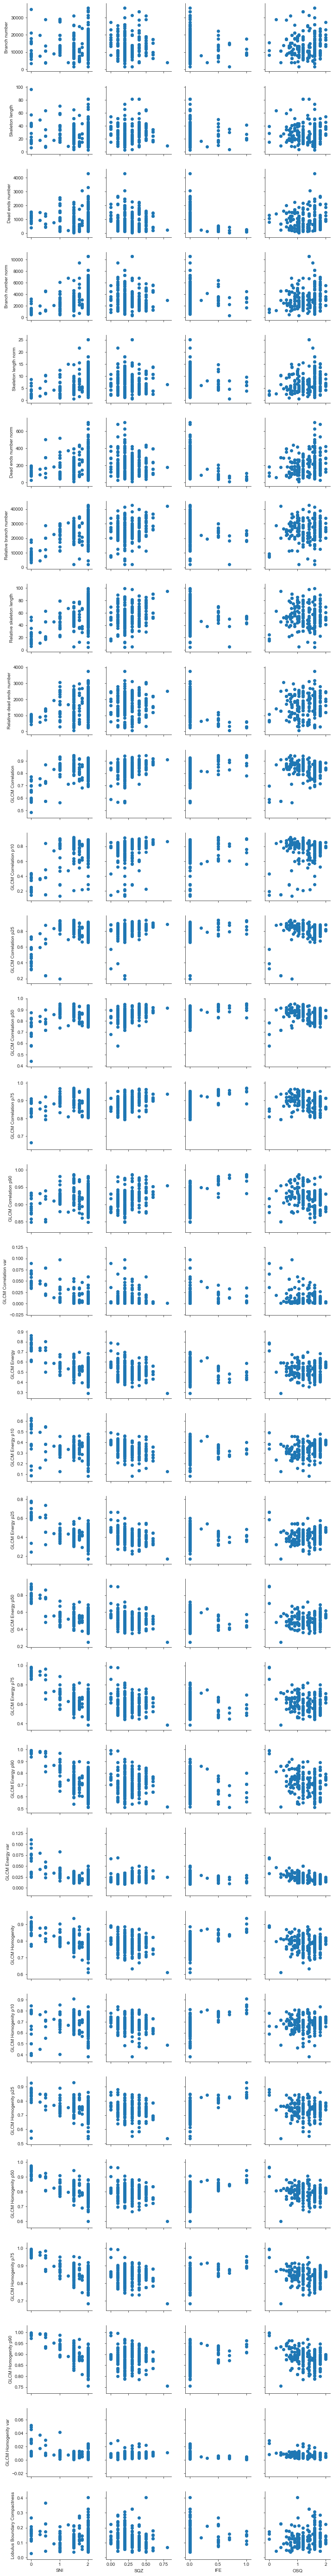

In [15]:
# iris = sns.load_dataset("iris")
g = sns.PairGrid(
    df[dfselector], y_vars=[
        *features
    ], 
    x_vars=[
#     "PFCVI", 
        "SNI", 
#         "SWP", 
        "SQZ",
#     "Sum Semi-q", 
        "IFE",
        "OSQ",
    ])
g.map(plt.scatter);

In [16]:
# ### Pearson correlation coefficient

# Absolute Pearson Correlation - usefull for linear



### Spearman correlation coefficient

Absolute Spearman Correlation 

In [17]:
# cm =sns.color_palette("coolwarm", 7, as_cmap=True)
cm = sns.light_palette("green", as_cmap=True)
# cm = sns.light_palette("green", as_cmap=True)
# dfcor.corr('spearman').abs().style.background_gradient(cmap=cm, low=0, high=1)
cor = df[dfselector][[
        *annotations,
#         "PFCVI", "SNI", "SWP", "CMP", "SQZ", "IFE", "OSQ",
        *features
]].corr('spearman').abs()[len(annotations):][[
    *annotations,
#     "PFCVI", "SNI", "SWP", "CMP", "IFE", "SQZ",  "OSQ",
#                                   "Sum Semi-q"
                                 ]].style.background_gradient(
    cmap=cm, 
#     cmap=plt.cm.Reds, 
    low=0, high=1)
cor
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)


,PFCVI,SNI,SWP,CMP,IFE,SQZ,OSQ
Branch number,0.00768832,0.117008,0.137885,0.000857261,0.161813,0.0184618,0.0913197
Skeleton length,0.081494,0.118397,0.173527,0.0606902,0.132627,0.00657607,0.0786151
Dead ends number,0.373662,0.0824844,0.535008,0.137422,0.452122,0.0704964,0.0544922
Branch number norm,0.72422,0.353751,0.845778,0.101086,0.0366118,0.0867163,0.211837
Skeleton length norm,0.653489,0.345496,0.792975,0.0478314,0.00432004,0.0606068,0.188596
Dead ends number norm,0.555082,0.212772,0.600144,0.019058,0.426812,0.174624,0.237266
Relative branch number,0.770349,0.412975,0.873355,0.30597,0.193357,0.203086,0.00120581
Relative skeleton length,0.761123,0.395468,0.867329,0.270006,0.110538,0.199868,0.00705333
Relative dead ends number,0.555082,0.186673,0.447555,0.284061,0.488363,0.00228731,0.0790747
GLCM Correlation,0.687317,0.259785,0.499644,0.503781,0.172991,0.381502,0.188064


## Graph for paper

In [18]:

best_features = [
#     "Branch number", "Skeleton length",
#                                   'GLCM Correlation',
#        'GLCM Correlation p10', 'GLCM Correlation p25', 'GLCM Correlation p50',
#        'GLCM Correlation p75', 'GLCM Correlation p90', 
    'GLCM Correlation var',
#        'GLCM Energy', 'GLCM Energy p10', 'GLCM Energy p25', 'GLCM Energy p50',
#        'GLCM Energy p75', 
    'GLCM Energy p90', 
#     'GLCM Energy var',
#        'GLCM Homogenity', 'GLCM Homogenity p10', 'GLCM Homogenity p25',
#        'GLCM Homogenity p50', 'GLCM Homogenity p75', 
    'GLCM Homogenity p90',
#        'GLCM Homogenity var',
#         'Lobulus Boundary Compactness',    
           ]
best_annotations = [
    "SNI",# "IFE", "SQZ"
]

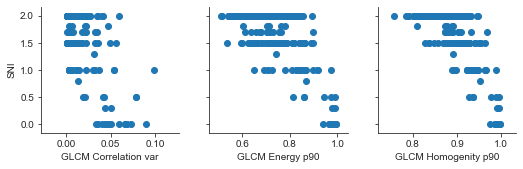

In [19]:
# iris = sns.load_dataset("iris")
g = sns.PairGrid(
    df[dfselector], y_vars=[
        *best_annotations
    ], 
    x_vars=[
        *best_features
    ])
ax = g.map(plt.scatter);
ax
# uu = ax.spines["top"].set_visible(True)
# uu = ax.spines["right"].set_visible(True)
# g.axes[0][0].ax.spines["top"].set_visible(True)
plt.savefig(output_path_images / "SNI_features.pdf", bbox_inches='tight')
plt.savefig(output_path_images / "SNI_features.png", bbox_inches='tight', dpi=800)

In [20]:
dir(g.axes[0][0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_in_layout',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title',
 '_make_twin_axes',
 '_

In [21]:
df[["Branch number", "GLCM Energy", "GLCM Homogenity", "GLCM Correlation"]].corrwith(df[["Skeleton length", "PFCVI", "SNI", "SWP", "Sum Semi-q"]])

Branch number      NaN
GLCM Correlation   NaN
GLCM Energy        NaN
GLCM Homogenity    NaN
PFCVI              NaN
SNI                NaN
SWP                NaN
Skeleton length    NaN
Sum Semi-q         NaN
dtype: float64

# Regression

In [53]:
from sklearn.model_selection import train_test_split
from typing import List

from sklearn.linear_model import LinearRegression
import sklearn

In [65]:
# features = all features

def train_and_measure_error(features:List[str]):
    
    print(features)
    dff = df[dfselector][features]
    X = dff.values
    y = df[dfselector]["SNI"].values

    display(X.shape)
    display(y.shape)

    # split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    reg = LinearRegression().fit(X_train, y_train)
    print(f"Score={reg.score(X_test, y_test)}")
    display(reg.coef_)

    display(reg.intercept_)
    print("predict")
    # display(reg.predict([X[:,5]]))
    # y[5]
    y_test_predict = reg.predict(X_test)
    mae = sklearn.metrics.mean_absolute_error(y_test, y_test_predict)
    print(f"Mean Absolute Error={mae}")
    return reg, X_train, X_test, y_train, y_test, mae

## All features

In [70]:
reg, X_train, X_test, y_train, y_test, mae = train_and_measure_error(features)

['Branch number', 'Skeleton length', 'Dead ends number', 'Branch number norm', 'Skeleton length norm', 'Dead ends number norm', 'Relative branch number', 'Relative skeleton length', 'Relative dead ends number', 'GLCM Correlation', 'GLCM Correlation p10', 'GLCM Correlation p25', 'GLCM Correlation p50', 'GLCM Correlation p75', 'GLCM Correlation p90', 'GLCM Correlation var', 'GLCM Energy', 'GLCM Energy p10', 'GLCM Energy p25', 'GLCM Energy p50', 'GLCM Energy p75', 'GLCM Energy p90', 'GLCM Energy var', 'GLCM Homogenity', 'GLCM Homogenity p10', 'GLCM Homogenity p25', 'GLCM Homogenity p50', 'GLCM Homogenity p75', 'GLCM Homogenity p90', 'GLCM Homogenity var', 'Lobulus Boundary Compactness']


(293, 31)

(293,)

Score=0.5066950741325495


array([ 1.77147656e-05, -9.50950827e-03,  7.40011949e-05, -4.01117119e-04,
        1.83364589e-01,  1.95876339e-03,  7.18806060e-05, -2.97685134e-02,
       -3.64666502e-04,  8.98405542e+00,  8.54528232e-01,  6.76432956e-01,
       -2.09894508e+00, -7.48376090e+00,  5.99076276e-01,  2.26923046e+01,
        1.25294728e-01, -8.18428223e+00, -1.15207562e+00,  1.32345456e+00,
        2.43277420e+00,  6.12456128e+00, -9.89829269e+01,  3.07047356e+01,
        4.36469006e+00, -5.61542490e+00, -1.32580768e+01, -3.54519589e+00,
       -1.76716625e+01,  1.52552469e+02, -2.42784567e+00])

4.838397065588123

predict
Mean Absolute Error=0.23417809464639405


In [71]:
# sl = slice(5,)
sl = [5,10,15]
display(X[sl, :])
display(y[sl])
display(reg.predict(X[sl,:]))

array([[1.79230000e+04, 3.69123300e+01, 1.46100000e+03, 3.20055539e+03,
        6.59152801e+00, 2.60894461e+02, 2.84163997e+04, 5.85234348e+01,
        2.31637337e+03, 8.73022250e-01, 8.41926927e-01, 8.61398295e-01,
        8.79744351e-01, 8.99224504e-01, 9.20651019e-01, 4.22382939e-03,
        4.90140023e-01, 2.58704033e-01, 3.42144588e-01, 4.75081118e-01,
        6.15230930e-01, 7.57938608e-01, 3.58607531e-02, 7.65262159e-01,
        6.27643136e-01, 7.00581832e-01, 7.73839815e-01, 8.38039964e-01,
        8.98010201e-01, 1.15373129e-02, 1.12630573e-01],
       [2.75970000e+04, 7.07943600e+01, 2.14100000e+03, 2.28913931e+03,
        5.87231047e+00, 1.77593480e+02, 1.40537381e+04, 3.60519402e+01,
        1.09030160e+03, 7.73739345e-01, 4.66662814e-01, 7.66050226e-01,
        8.30658056e-01, 8.94402973e-01, 9.28770121e-01, 3.67497279e-02,
        6.54269762e-01, 1.25910284e-01, 4.98881635e-01, 7.34220705e-01,
        8.85879100e-01, 9.71544229e-01, 8.27844974e-02, 7.94820522e-01,
       

array([1.5, 1. , 0.3])

array([1.47832055, 0.75728046, 0.7297492 ])

## Feature selection

In [24]:
from sklearn.feature_selection import f_regression, mutual_info_regression
mutual_info_regression(X_train, y_train)

array([0.04583841, 0.07458072, 0.15464051, 0.10731467, 0.1199008 ,
       0.03908571, 0.22795089, 0.24854053, 0.11614828, 0.21925918,
       0.21885185, 0.20183241, 0.09243945, 0.12218993, 0.1032066 ,
       0.25486659, 0.31072448, 0.1358469 , 0.27019111, 0.31677787,
       0.31786909, 0.34685751, 0.30195258, 0.17724793, 0.12882647,
       0.19296429, 0.32127841, 0.35996455, 0.38955096, 0.14053623,
       0.07604749])

In [78]:
import joblib
reg_bf, X_train_bf, X_test_bf, y_train_bf, y_test_bf, mae_bf = train_and_measure_error(best_features)

['GLCM Correlation var', 'GLCM Energy p90', 'GLCM Homogenity p90']


(293, 3)

(293,)

Score=0.6496996261562313


array([-12.3013377 ,  -0.80622769,  -4.60921161])

6.522045270947319

predict
Mean Absolute Error=0.21791884456115096


['../scaffan/SNI_regresor_area.last.joblib']

### Save regressor

In [108]:
joblib.dump({"regressor": reg_bf, "fetures": best_features}, "../scaffan/models/SNI_area_regressor.last.joblib")

['../scaffan/models/SNI_area_regressor.last.joblib']

## Try automatic selection

In [84]:
# import sklearn
# sklearn.

In [85]:
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
# dff = df[dfselector][features]
# Xf = dff.values




# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
# clf = LassoCV(cv=5)
# clf = LassoCV()
# clf = LinearSVC()
clf = LinearRegression()


# Set a minimum threshold of 0.25
# sfm = SelectFromModel(clf)# , max_features=3)#, threshold=0.1)
sfm = SelectFromModel(clf, max_features=3)#, threshold=0.1)
sfm.fit(X_train, y_train)
display(sfm.get_support())
Xtr_train = sfm.transform(X_train)
Xtr_test = sfm.transform(X_test)
print(f"new shape={Xtr_test.shape}")

clf.fit(Xtr_train, y_train)
display("score")
display(clf.score(Xtr_test, y_test))
clf.score



array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False,  True, False])

new shape=(59, 3)


'score'

0.47444240614009614

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

### Selected features

In [86]:
np.asarray(features)[sfm.get_support()]

array(['GLCM Energy var', 'GLCM Homogenity', 'GLCM Homogenity var'],
      dtype='<U28')

In [87]:
sfm.estimator_.coef_

array([ 1.77147656e-05, -9.50950827e-03,  7.40011949e-05, -4.01117119e-04,
        1.83364589e-01,  1.95876339e-03,  7.18806060e-05, -2.97685134e-02,
       -3.64666502e-04,  8.98405542e+00,  8.54528232e-01,  6.76432956e-01,
       -2.09894508e+00, -7.48376090e+00,  5.99076276e-01,  2.26923046e+01,
        1.25294728e-01, -8.18428223e+00, -1.15207562e+00,  1.32345456e+00,
        2.43277420e+00,  6.12456128e+00, -9.89829269e+01,  3.07047356e+01,
        4.36469006e+00, -5.61542490e+00, -1.32580768e+01, -3.54519589e+00,
       -1.76716625e+01,  1.52552469e+02, -2.42784567e+00])

### Error

In [88]:

y_test_predict = clf.predict(Xtr_test)
sklearn.metrics.mean_absolute_error(y_test, y_test_predict)

0.24305657337172987

# Prediction example

In [89]:
sl = [5,10,50]
Xtr = sfm.transform(X)
display(Xtr[sl, :])
display(y[sl])
display(clf.predict(Xtr[sl,:]))

array([[0.03586075, 0.76526216, 0.01153731],
       [0.0827845 , 0.79482052, 0.04155   ],
       [0.03434028, 0.83012166, 0.00754758]])

array([1.5, 1. , 0.8])

array([1.56365055, 0.28689346, 1.29046363])

In [90]:
dfs = df[dfselector]

In [91]:
# dfs["Prediction"] = clf.predict(Xtr)
dfs["Prediction"] = reg.predict(X)

C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [92]:
# list(dfs.keys())

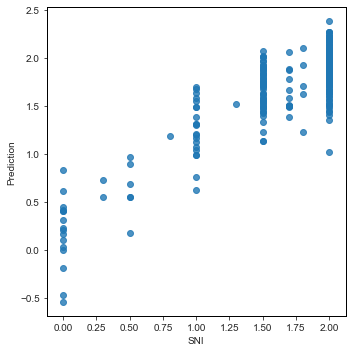

In [93]:
wax = sns.lmplot(data=dfs, x="SNI", y="Prediction", fit_reg=False)
ax = wax.ax
uu = ax.spines["top"].set_visible(True)
uu = ax.spines["right"].set_visible(True)
plt.savefig(output_path_images / "SNI_prediction.pdf", bbox_inches='tight')
plt.savefig(output_path_images / "SNI_prediction.png", bbox_inches='tight', dpi=800)

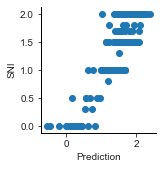

In [94]:

g = sns.PairGrid(
    dfs, y_vars=[
        *best_annotations
    ], 
    x_vars=[
#         *best_features
        "Prediction"
    ])
g.map(plt.scatter);

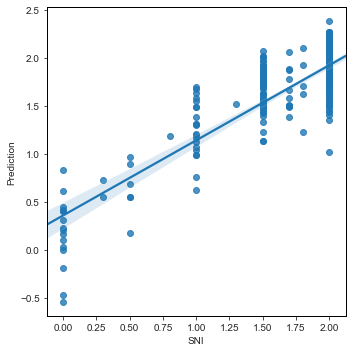

In [95]:
# sns.set_style("white")
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
# with sns.axes_style("ticks"):

#     sns.despine()
wax = sns.lmplot(data=dfs, x="SNI", y="Prediction")
ax = wax.ax
uu = ax.spines["top"].set_visible(True)
uu = ax.spines["right"].set_visible(True)
# ax.axes.set_axis_on()
# ax.axes.spi
# uu.set_visible(True)
# dir(uu)

In [96]:
# plt.rcParams

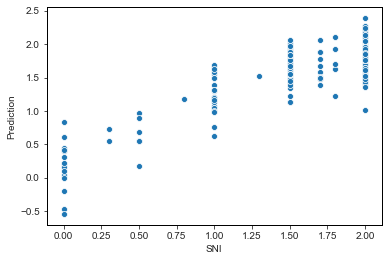

In [97]:
# sns.despine()
sns.scatterplot(data=dfs, x="SNI", y="Prediction")


# Tools

In [98]:
import matplotlib.pyplot as plt
from mpl_toolkits import axes_grid1

def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)

# Per-pixel regression

## Select features

In [99]:
pp_features = [
    'GLCM Energy', 
    'GLCM Homogenity',
#     "Branch number", "Skeleton length"
    'GLCM Correlation',
#        'GLCM Correlation p10', 'GLCM Correlation p25', 'GLCM Correlation p50',
#        'GLCM Correlation p75', 'GLCM Correlation p90', 
#     'GLCM Correlation var',

    #'GLCM Energy p10', 'GLCM Energy p25', 'GLCM Energy p50',
#        'GLCM Energy p75', 
#     'GLCM Energy p90', 
#     'GLCM Energy var',
    
    #'GLCM Homogenity p10', 'GLCM Homogenity p25',
#        'GLCM Homogenity p50', 'GLCM Homogenity p75', 
#     'GLCM Homogenity p90',
#        'GLCM Homogenity var',
#         'Lobulus Boundary Compactness',    
]
pp_annotations = [
    "SNI",# "IFE", "SQZ"
]

In [100]:
dff = df[dfselector][pp_features]
X = dff.values
y = df[dfselector]["SNI"].values

display(X.shape)
display(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

(293, 3)

(293,)

## Train

In [101]:
from sklearn.svm import SVR


regressor = LinearRegression()
regressor = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)   # SVR RBF

reg = regressor.fit(X_train, y_train)
display("Score")
display(reg.score(X_test, y_test))
if hasattr(reg, "coef_"):
    display(reg.coef_)

display(reg.intercept_)
print("predict")
# display(reg.predict([X[:,5]]))
# y[5]
y_test_predict = reg.predict(X_test)
sklearn.metrics.mean_absolute_error(y_test, y_test_predict)

'Score'

0.530027919647883

array([-9.35912853])

predict


0.23251131002314654

### Save regressor

In [109]:

joblib.dump({"regressor": regressor, "features": pp_features}, "../scaffan/models/SNI_per-pixel_regressor.last.joblib")

['../scaffan/models/SNI_per-pixel_regressor.last.joblib']

2020-03-25 11:27:18.198 | DEBUG    | io3d.cachefile:__init__:26 - cache filename: ~/.io3d_cache.yaml
2020-03-25 11:27:18.207 | DEBUG    | io3d.datasets:dataset_path:393 - checking for key local_dataset_specific_dir_.
2020-03-25 11:27:18.209 | DEBUG    | io3d.datasets:dataset_path:393 - checking for key local_dataset_specific_dir_medical
2020-03-25 11:27:18.212 | DEBUG    | io3d.datasets:dataset_path:393 - checking for key local_dataset_specific_dir_medical/orig
2020-03-25 11:27:18.214 | DEBUG    | io3d.datasets:dataset_path:393 - checking for key local_dataset_specific_dir_medical/orig/sample_data
2020-03-25 11:27:18.217 | DEBUG    | io3d.datasets:dataset_path:393 - checking for key local_dataset_specific_dir_medical/orig/sample_data/SCP003
2020-03-25 11:27:18.220 | DEBUG    | io3d.datasets:join_path:303 - sample_data_pathC:\Users\Jirik\data
2020-03-25 11:27:18.221 | DEBUG    | io3d.datasets:join_path:304 - path C:\Users\Jirik\data\medical\orig\sample_data\SCP003\SCP003.ndpi
2020-03-25

filename: C:\Users\Jirik\data\medical\orig\sample_data\SCP003\SCP003.ndpi


2020-03-25 11:27:19.761 | DEBUG    | scaffan.annotation:read_annotations:122 - windows annotation output:b'\x1b2020-03-25 11:27:19.613\x1b | \x1b\x1bDEBUG   \x1b | \x1bscaffan.annotation\x1b:\x1bndpa_to_json\x1b:\x1b72\x1b - \x1b\x1bPATH: ...\\bin;C:\\Users\\Jirik\\Downloads\\openslide-win64-20171122\\bin;C...\x1b\r\n'


[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 25, 26, 28, 33]


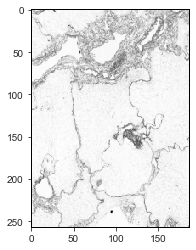

In [103]:
path_to_script =  Path("~/projects/scaffan/").expanduser()
sys.path.insert(0,str(path_to_script))
import scaffan
import scaffan.texture
import io3d # just to get data
import scaffan.image as scim
import io3d
fn = io3d.datasets.join_path("medical", "orig", "sample_data", "SCP003", "SCP003.ndpi", get_root=True)
print(f"filename: {fn}")
anim = scim.AnnotatedImage(fn)

ann_ids = anim.select_annotations_by_color("#000000")
print(ann_ids)
view = anim.get_views(ann_ids, level=7)[0]
view2 = view.to_pixelsize(pixelsize_mm=[0.01,0.01])
img = view2.get_region_image(as_gray=True)
plt.imshow(img, cmap='gray')

2020-03-25 11:28:38.316 | DEBUG    | scaffan.texture:run:273 - GLCM max energy, homogeneity, correlation: [1. 1. 1.]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
2020-03-25 11:28:41.280 | DEBUG    | scaffan.texture:run:298 - No lobulus segmentation given
2020-03-25 11:28:47.165 | DEBUG    | scaffan.texture:run:317 - GLCM textures for id 0 finished


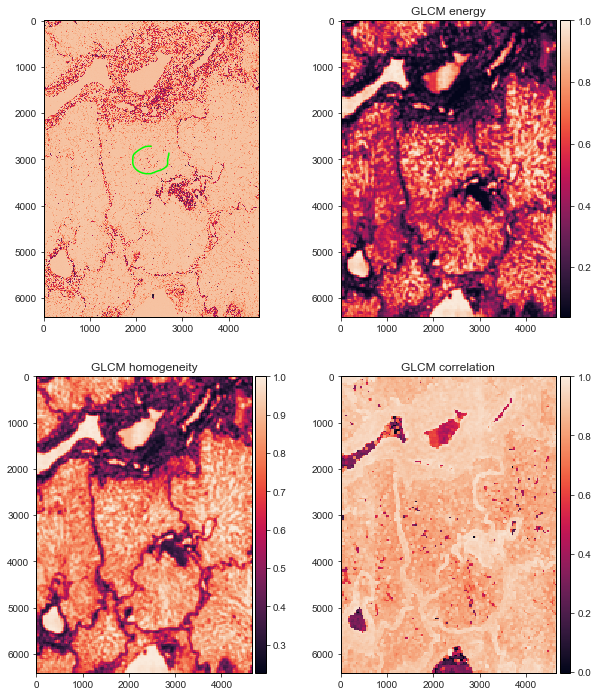

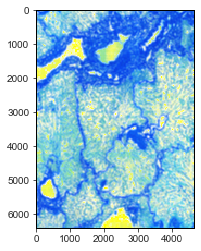

In [104]:
tm = scaffan.texture.GLCMTextureMeasurement()
tm.set_input_data(view2, annotation_id=0, lobulus_segmentation=None)
tm.run()
img = tm.measured_features

## SNI prediction

C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  


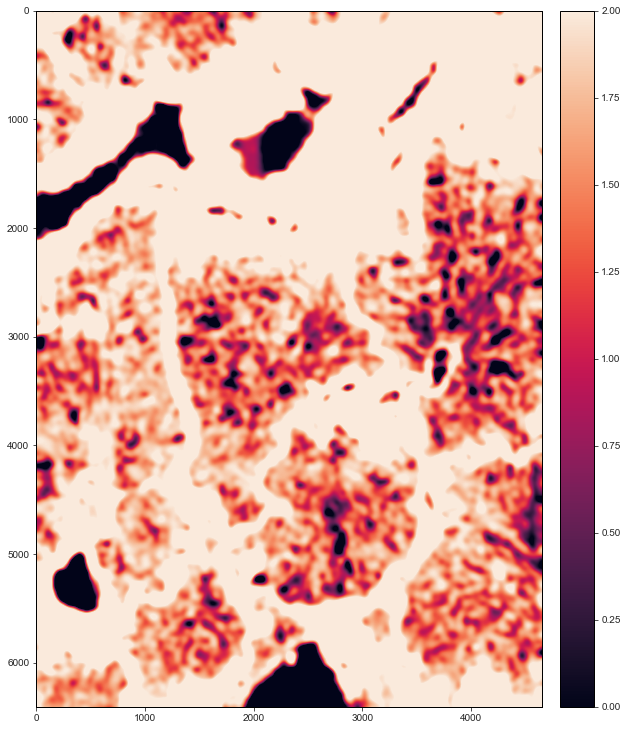

In [105]:
import skimage.filters
imgf = skimage.filters.gaussian(img, 20)
x_img_ravel = imgf.reshape(-1,3)  # make long array with size [n_pixels, n_channels]
y_img = reg.predict(x_img_ravel)
img_predict = y_img.reshape(img.shape[0], img.shape[1])

plt.figure(figsize=[10,15])
ax = plt.imshow(img_predict, vmin=0, vmax=2)
add_colorbar(ax)